#intro

#fake waveform

The point here is to simulate the expected waveform combining the noise and the signal from a potential source.
The noise simulation is a produced via its spectrum. We set a constant spectrum between the frequency of our receiver (in the case of the LNB, with the down conversion, we set the bandwidth between 0.950 and 1.750 GHz). The phase is drawn randomly in a uniform distribution between -pi and pi.

For the signal, we don't assume any shower or physical source. We simply multiply a noise waveform as defined above, with a chosen function (a simple one being a gaussian shape). It will maybe be clearer with a few plots.

##noise waveform

The noise spectrum (or waveform) is scaled so that the mean power gives:
\begin{equation}
    P_{noise} = k_{B}*T_{sys}*G_{LNA}*BW = <\frac{V_{noise}^2}{50}>
\end{equation}

In [1]:
%matplotlib inline 

ratio =  1.40314924868


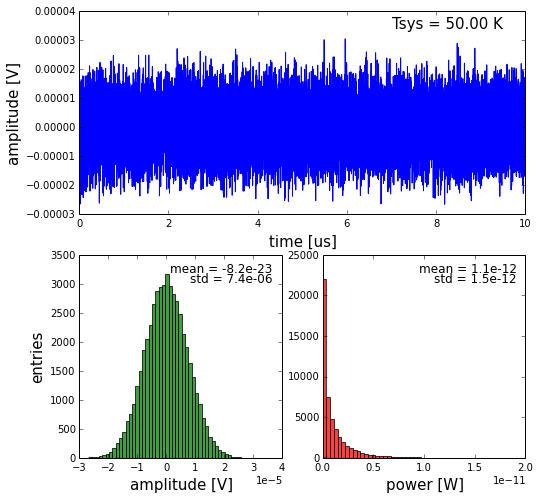

In [2]:
import os
os.chdir('/Users/romain/work/Auger/EASIER/LPSC/filter/test/')
%run noise.py

In this example we have a temperature of 50K.
The mean voltage is close to 0 and we can check that:

In [3]:
kb= 1.38e-23
Tsys = 50
bw = 8e8
meanPnoise = kb*Tsys*bw
print 'mean P noise = ' , meanPnoise

mean P noise =  5.52e-13


Note also that the ratio of the RMS of the power and its mean is around $\sqrt{2}$

##signal waveform

For the signal we assume that we know the MW signal after the antenna, i.e. we want to produce:
\begin{equation}
    P_{signal}(t) = F(t).A_{eff}(\theta(t)).BW
\end{equation}
where F(t) is the flux at ground from an emission point.

If we assume a symetric signal with a given signal to noise ratio and a given length we obtain for instance:
- SNR = 1 and signal length = 50e-9

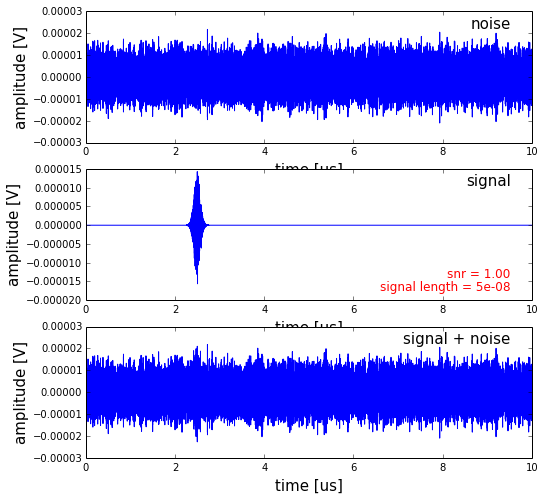

In [4]:
import os
os.chdir('/Users/romain/work/Auger/EASIER/LPSC/filter/test/')
%run signal.py 1 50e-9

- SNR = 5 and signal length = 50e-9

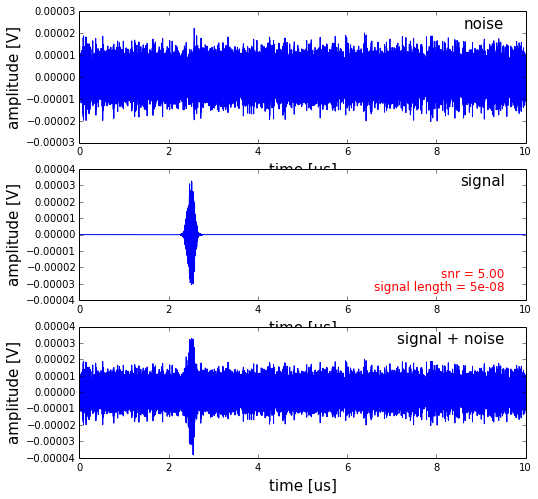

In [5]:
%run signal.py 5 50e-9

- SNR = 1 and signal length = 1e-6

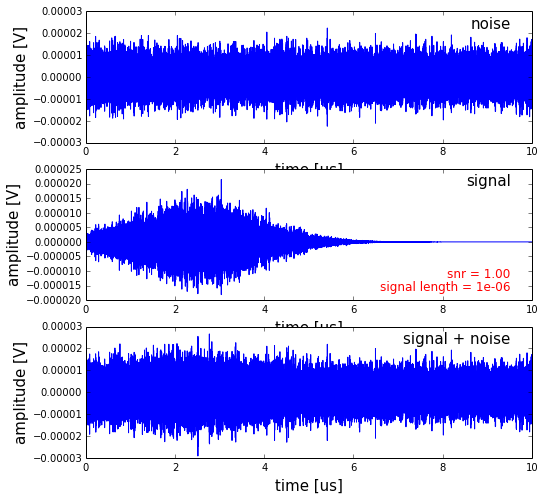

In [6]:
%run signal.py 1 1000e-9

#electronics simulation

For the electronics simulation, we keep the same method we developped for EASIER for the power detector simulation.
The procedure to go from a HF voltage waveform to a power detected waveform:

- first take the power: $P = V^2/50$
- second log it 
- convolve with a exponential decay function

To obtain number that make sense after the convolution, 
one has to be sure the exponential function is normalized to 1.

The parameters I took in my thesis are:
- exponential trace length: 500ns
- sampling: 0.2ns

We obtain something like:


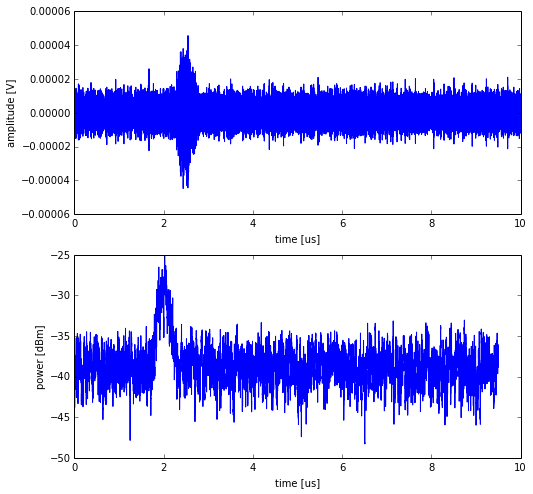

In [7]:
import os
os.chdir('/Users/romain/work/Auger/EASIER/LPSC/filter/test/')
%run det.py

**remark:**
- the actuall baseline power doesn't match the power. This is due to the fact that the convolution with the exponential is a sort of filtering which is a sort of average. And here that means that we average on the log of the power which different from the log of the average. We need some additional factor to obtain the power.

We can check the consitency of what we are doing by inputting different SNR and looking at the output:

input snr =  10 output snr =  9.23715579002
input snr =  100 output snr =  95.1424675326


detcheck.py:20: RuntimeWarning: invalid value encountered in log10
  return np.log10((a/sigma)*np.exp(-((x - mu)/sigma)**2)+1e-10) + b


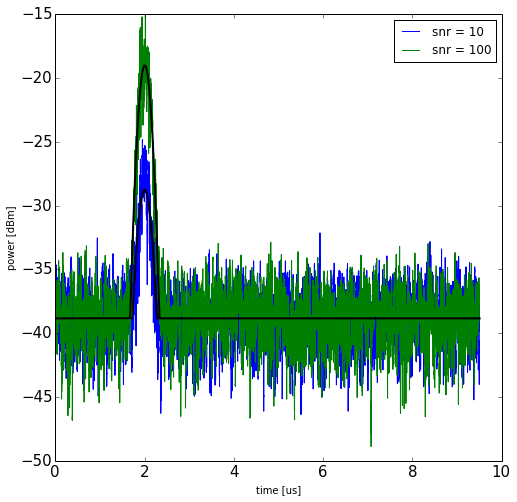

In [11]:
import os
os.chdir('/Users/romain/work/Auger/EASIER/LPSC/filter/test/')
%run detcheck.py

We can see large fluctuation around the signal, so if we look at the maximum we overestimated the SNR.
So we fitted the signal with the log10 of an gaussian plus a constant.
When we look at the input SNR and the output one, we have something close in this example. 
Here is a more systematic check:


detcheck.py:20: RuntimeWarning: invalid value encountered in log10
  return np.log10((a/sigma)*np.exp(-((x - mu)/sigma)**2)+1e-10) + b


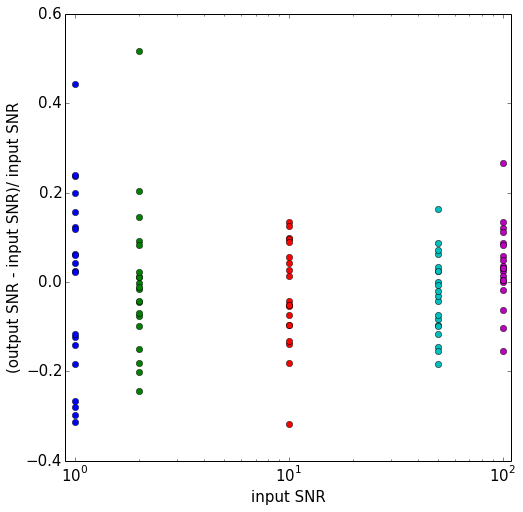

In [12]:
import os
os.chdir('/Users/romain/work/Auger/EASIER/LPSC/filter/test/')
%run detcheck.py

## power detector characteristic

In order to go to power detector values I had found the following parameters:
\begin{equation}
    V_{PD} = k - 0.023 p
\end{equation}
with k = 0.074

p: the power found previously



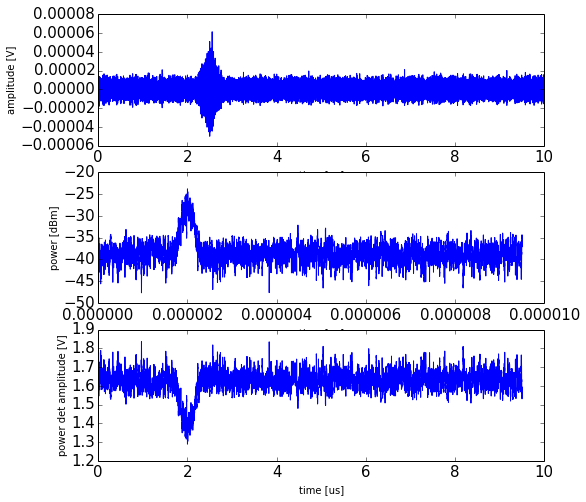

In [13]:
import os
os.chdir('/Users/romain/work/Auger/EASIER/LPSC/filter/test/')
%run powerdet.py

**remark** we also included a gain of 60dB to be inside the dynamic of the power detector.

##adaptation board

adaptatation simply multiply the power detector output voltage and adds an offset to fit the 20dB bandwidth into the [0;-2V] of input of the SD front end.
Here it is rather setup dependent, the first EASIER had the baseline a little above -2V and the signal going toward 0V
(which means in ADC that the baseline is around 700-800 and the signal goes does)
This was changed in GIGAS for power consumption reason.

Anyway, here we adopt the GIGAS setup, that means the voltage after the power detector is multiplied by -4
and we add a positive offset.

Here is an example:

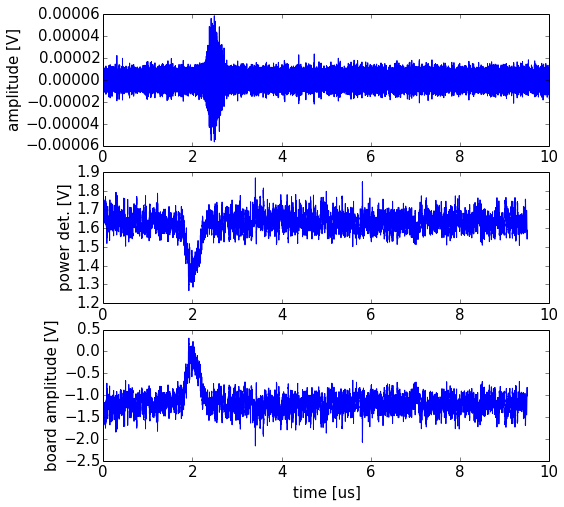

In [14]:
import os
os.chdir('/Users/romain/work/Auger/EASIER/LPSC/filter/test/')
%run adaptationboard.py

##Front End

The front end is divided into 4 parts in the simulation:

- a low pass filter (anti aliasing)
- time sampling (40MS/s)
- a gain of -1/2
- amplitude sampling ([0; 1V]  $\rightarrow$ [0;1023 ADC])

###Filter

**to be checked: The filter is a butterworh 4th order filter tuned at 20MHz.**
The characteristics of this filter are already implemented in the signal package of scipy.
So we just make the signal go through this filter.

The result is:

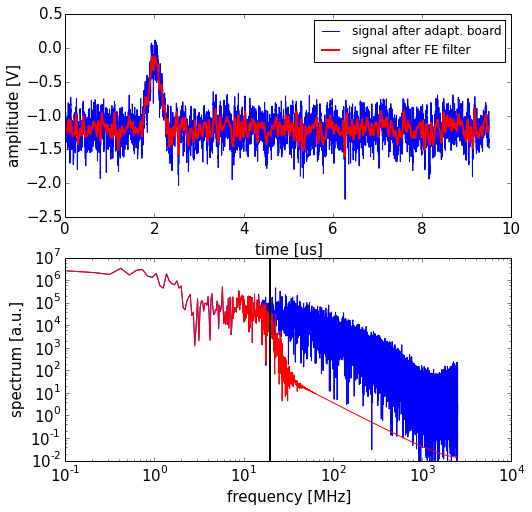

In [16]:
import os
os.chdir('/Users/romain/work/Auger/EASIER/LPSC/filter/test/')
%run FEfilter.py

If we zoom a little on the signal we get:

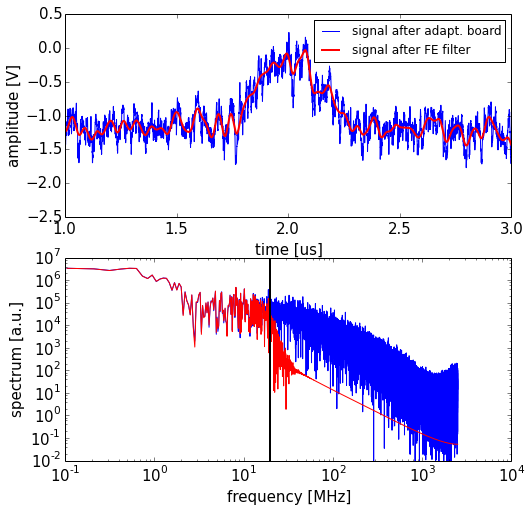

In [17]:
%run FEfilter.py

### sampling (time and amplitude)

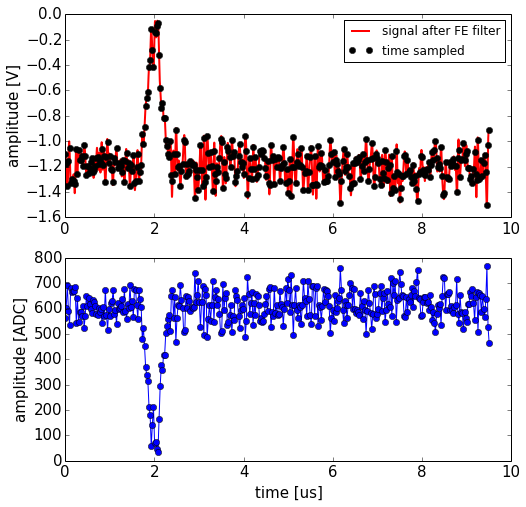

In [19]:
import os
os.chdir('/Users/romain/work/Auger/EASIER/LPSC/filter/test/')
%run FEsampling.py

Then the amplitude sampling:

#Use an file as an input signal

One can also use a file with two columns with [ time power ] to input the signal.
The power is the expected power after the antenna from the MBR. 
In principle, the signal don't have to be sampled regularly, or at the specific rate.

See for instance this fake signal:

0 1e-12

10e-9 2e-12

20e-9 3e-12

30e-9 4e-12

35e-9 5e-12

50e-9 4e-12

100e-9 3e-12



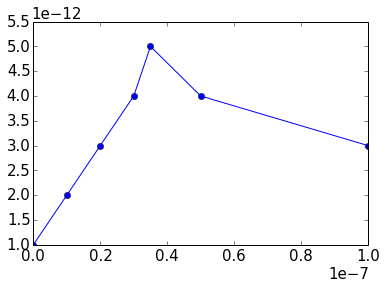

In [15]:
import os
import matplotlib.pyplot as plt
os.chdir('/Users/romain/work/Auger/EASIER/LPSC/filter/test/')
utilspath = cwd + '/../utils/'
datapath = cwd + '/../data/'
sys.path.append(utilspath)
filename = 'testenvelope.txt'
filename = datapath + filename
f = open(filename,'r+')
x = np.array([])
y = np.array([])
for l in f:
    x = np.append(x,l.split()[0])
    y = np.append(y,l.split()[1])
    print l
plt.plot(x,y,'o-')


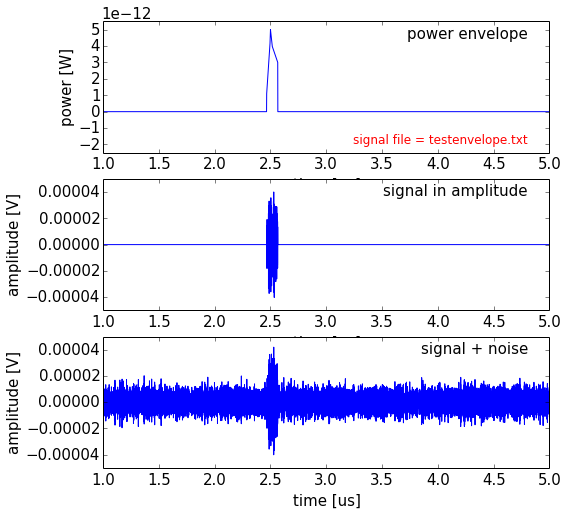

In [21]:
import os
os.chdir('/Users/romain/work/Auger/EASIER/LPSC/filter/test/')
%run simwithfile.py

The rest of the simulation (the electronics) is the same.

#Improving SNR

The point of this section is to look at ways to increase the SNR by filtering.
We want to look at different filters, either simple frequency cut or matched filter (filtering with the expected signal).

We will try to define parameters to choose the best filter (such as SNR improvement, but also robustness)

##initial processing on simulated data

What we get from the simulation described above is the ADC vs time. In our usual analysis, we transform the ADC (in log) unit to something linear, either watt or in standard deviation unit.  
So that's what we do first:

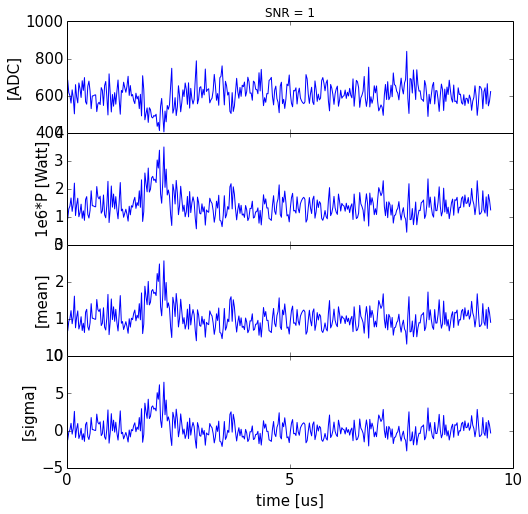

In [30]:
import os
os.chdir('/Users/romain/work/Auger/EASIER/LPSC/filter/analysis/')
%run getpower.py

As another check we see that for a SNR =1 i.e. the $\rm P_{signal} =  <P_{noise}>$ 

- in ADC: we expect 3dB i.e. 150 ADC of difference with the baseline
- in unit of mean (or watt): we expect the signal to be twice the noise (Ptot = Pnoise+ Psignal = 2Pnoise)
- in sigma unit: this depends on the integration time of the power detector.

For a SNR= 10 we get:

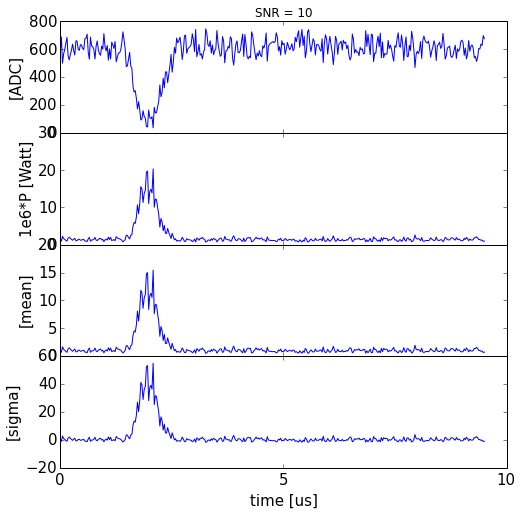

In [28]:
import os
os.chdir('/Users/romain/work/Auger/EASIER/LPSC/filter/analysis/')
%run getpower.py

## signal filtering

Now we want to look at the effect of filters on the waveform to extract the signal with better efficiency.  

###Simple filter

What I define as simple filter is a low pass filter with a fixed cut off frequency. 
(it is an unreal filter with infinite slope, the fourier coefficient above the cut in frequency are set to 0)  
We compare the waveform in sigma unit. Since hopefully the filter will keep the signal but reduce the noise (i.e. reduce the sigma) a higher signal in sigma means a better sensitivity.  
First we look at some examples (parameters like snr/signal length/fcut are written on the plot):

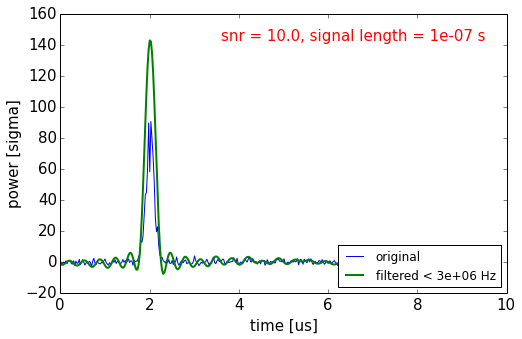

In [2]:
import os
os.chdir('/Users/romain/work/Auger/EASIER/LPSC/filter/analysis/')
%run simplefilter.py 10 100e-9 3e6

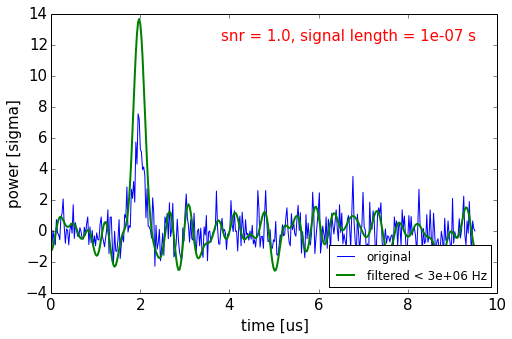

In [3]:
%run simplefilter.py 1 100e-9 3e6

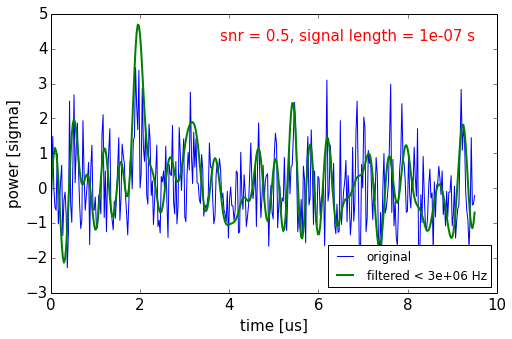

In [4]:
%run simplefilter.py 0.5 100e-9 3e6

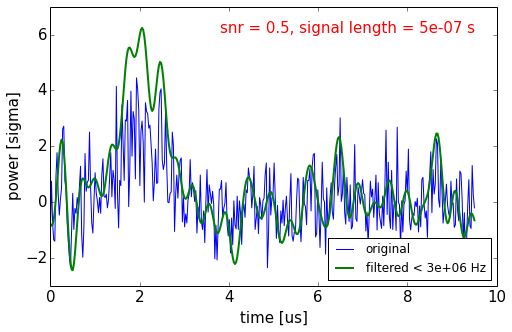

In [5]:
%run simplefilter.py 0.5 500e-9 3e6

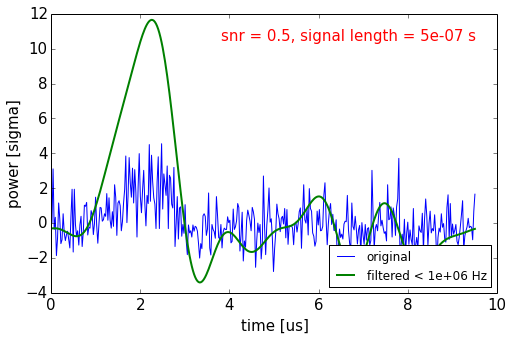

In [8]:
%run simplefilter.py 0.5 500e-9 1e6

We see that obviously the SNR improvement will depend on the signal length/filter cut.  
See for instance the following examples:

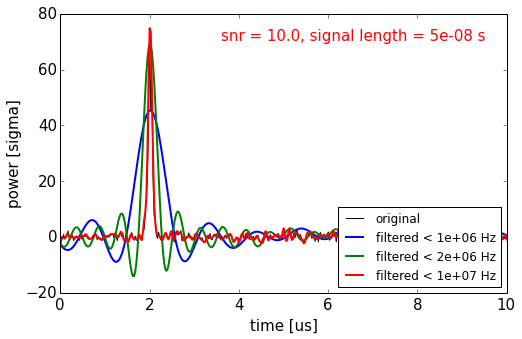

In [20]:
import os
os.chdir('/Users/romain/work/Auger/EASIER/LPSC/filter/analysis/')
%run varyfilter.py 10 50e-9

Here the input SNR is large, and the signal is short a low frequency filter decrease the SNR.

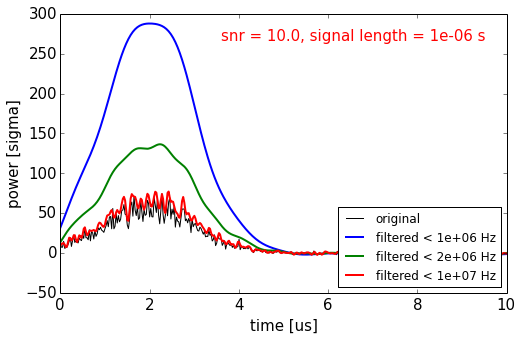

In [21]:
import os
os.chdir('/Users/romain/work/Auger/EASIER/LPSC/filter/analysis/')
%run varyfilter.py 10 1000e-9

Here the input SNR is large, and the signal is long a low frequency filter increase the SNR and the high frequency cut sort of follow the input waveform

We see that a simple filter should be optimized depending on the input signal.  
That's why we actually want to filter with the expected signal itself.  
That's the point of the so called adapted filter.

### adapted filter

The adapted filter is the best filter you can find because you select the frequencies that are in you signal.  
In term of signal processing, this is done by doing the cross correlation of the input signal with the output signal.  
Here is what we get:

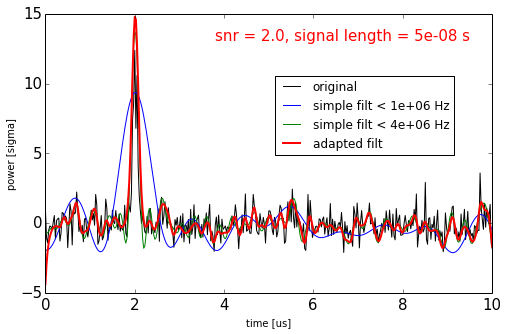

In [33]:
import os
os.chdir('/Users/romain/work/Auger/EASIER/LPSC/filter/analysis/')
%run correlfilter.py 2 50e-9

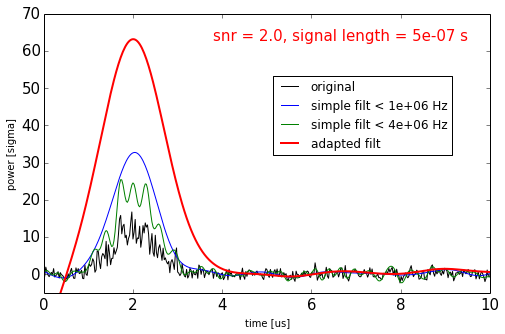

In [34]:
import os
os.chdir('/Users/romain/work/Auger/EASIER/LPSC/filter/analysis/')
%run correlfilter.py 2 500e-9

We always get the best improvement.

Sometimes, the filter does a equivalent job, that because the input signal is still a gaussian and the fourier transform of a gaussian is a gaussian so we have also a filter with a cut that could look like a simple filter.

See the comparison of the filter and input signal (gaussian) spectrum:

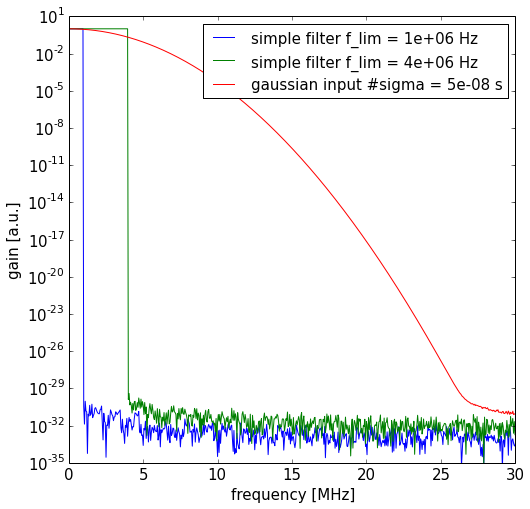

In [7]:
import os
os.chdir('/Users/romain/work/Auger/EASIER/LPSC/filter/test/')
%run filter

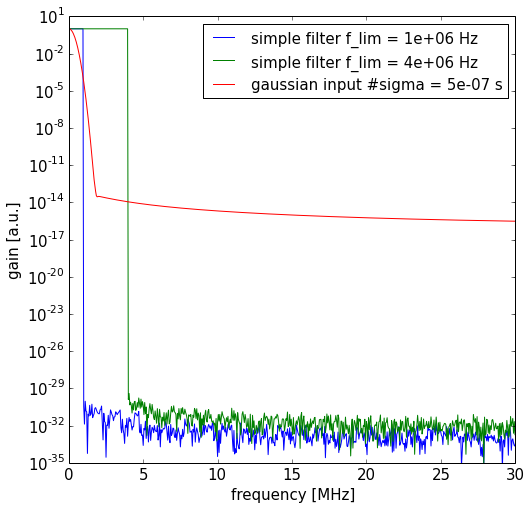

In [5]:
import os
os.chdir('/Users/romain/work/Auger/EASIER/LPSC/filter/test/')
%run filter

**sum up plot**

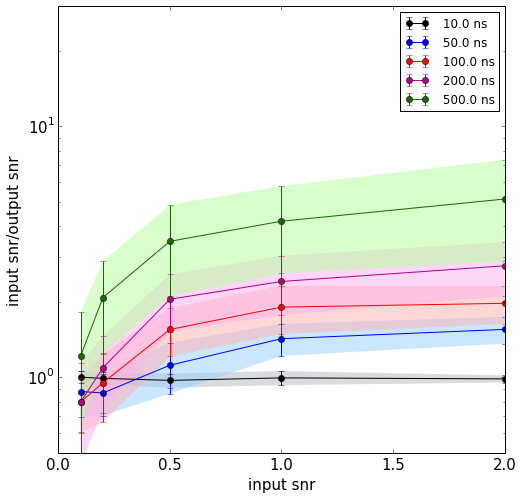

In [3]:
import os
os.chdir('/Users/romain/work/Auger/EASIER/LPSC/filter/analysis/')
%run scancorrefilter.py